## ***Introduction to Computer Vision***

---



# ***– Homework –***

Hajar Lekrafi 115303

# ***Importing Libraries***

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

This code block imports essential libraries for building, training, and evaluating a Convolutional Neural Network (CNN) for image classification. tensorflow and tensorflow.keras provide tools for constructing and training neural networks. numpy handles numerical operations, and matplotlib.pyplot is used for data visualization. The sklearn.metrics module offers functions to calculate performance metrics like confusion matrix, precision, recall, F1 score, and accuracy, which are vital for evaluating the model's effectiveness. These imports collectively enable a comprehensive setup for developing and analyzing the CNN model.

# ***Loading CIFAR10 Dataset***

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


This line of code loads the CIFAR-10 dataset, which is a collection of 60,000 32x32 color images in 10 different classes, split into 50,000 training images and 10,000 test images. The `datasets.cifar10.load_data()` function retrieves the data and returns it as four NumPy arrays: `train_images` and `train_labels` for training, and `test_images` and `test_labels` for testing. This dataset is commonly used for training machine learning and computer vision models.

# ***Creating Binary Labels and normalizing Images***

In [12]:
# Define classes that can fly (1) and cannot fly (0)
fly_classes = [0, 2]
cannot_fly_classes = [1, 3, 4, 5, 6, 7, 8, 9]

def binary_label(label):
    if label in fly_classes:
        return 1
    else:
        return 0

train_labels_binary = np.array([binary_label(label[0]) for label in train_labels])
test_labels_binary = np.array([binary_label(label[0]) for label in test_labels])

# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

 This code segment prepares data for a binary classification task distinguishing between classes that can fly and those that cannot fly. It starts by defining two lists, fly_classes and cannot_fly_classes, which contain the indices of classes corresponding to entities that can and cannot fly, respectively. The binary_label function then takes a label as input and returns 1 if it belongs to a class that can fly and 0 otherwise. Subsequently, the function is applied to each label in the train_labels and test_labels arrays, generating binary labels for training and testing datasets. Finally, the pixel values of the image data in train_images and test_images are normalized by dividing them by 255.0, ensuring that the values fall within the range [0, 1]. This normalization step is essential for improving the convergence and performance of many machine learning algorithms when working with image data.

# ***Defining the CNN Architecture:***

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

We define a Convolutional Neural Network (CNN) model using the Keras Sequential API, commonly employed for image classification tasks. The architecture comprises three Convolutional layers, each followed by a MaxPooling layer, which progressively extracts and reduces spatial features from the input images. The ReLU activation function is applied after each convolutional operation, introducing non-linearity and allowing the network to learn complex patterns. Following the convolutional layers, a Flatten layer reshapes the 3D feature maps into a 1D vector, preparing them for input into the fully connected layers. Two Dense layers are then utilized for classification, with the first containing 64 units and the ReLU activation function. Finally, the output layer consists of a single neuron employing a sigmoid activation function, generating a probability score indicating the likelihood of the input image belonging to a particular class. This architecture demonstrates a standard CNN setup, leveraging convolutional and pooling layers for feature extraction and fully connected layers for classification, making it suitable for binary classification tasks.

# ***Compiling the Model:***

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

This line compiles the defined model using the Adam optimizer, which is an adaptive learning rate optimization algorithm. The choice of optimizer is crucial for efficient training of neural networks, and Adam is known for its robust performance across various tasks. The loss function specified here is binary_crossentropy, which is commonly used for binary classification problems. This loss function calculates the difference between the predicted probabilities and the true labels, penalizing deviations from the actual class labels. Additionally, the accuracy metric is specified to monitor the performance of the model during training. This metric computes the proportion of correctly classified samples over the total number of samples, providing insight into the model's classification accuracy. Overall, this compilation step configures the model for training by specifying the optimization algorithm, loss function, and evaluation metric.

# ***Training the Model:***

In [8]:
history = model.fit(train_images, train_labels_binary, epochs=10,
                    validation_data=(test_images, test_labels_binary))

Epoch 1/10
1563/1563 [==============================] - 91s 57ms/step - loss: 0.4074 - accuracy: 0.8294 - val_loss: 0.3509 - val_accuracy: 0.8544
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3330 - accuracy: 0.8624 - val_loss: 0.3164 - val_accuracy: 0.8725
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3013 - accuracy: 0.8785 - val_loss: 0.3069 - val_accuracy: 0.8749
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.2774 - accuracy: 0.8877 - val_loss: 0.2842 - val_accuracy: 0.8860
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2568 - accuracy: 0.8968 - val_loss: 0.3044 - val_accuracy: 0.8812
Epoch 6/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.2375 - accuracy: 0.9055 - val_loss: 0.2712 - val_accuracy: 0.8956
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2209 - accuracy: 0.9117 - val_loss: 0.3008 -

This code snippet trains the compiled model using the `fit` method. It takes the training images (`train_images`) and corresponding binary labels (`train_labels_binary`) as input data. The `epochs` parameter is set to 10, indicating the number of times the entire training dataset will be passed forward and backward through the neural network. During training, the model's performance on the validation data, consisting of `test_images` and `test_labels_binary`, is evaluated after each epoch. This helps monitor the model's generalization ability and detect overfitting. The training history, including loss and accuracy metrics, is stored in the `history` object, which can be used for visualizations and further analysis. Overall, this line of code initiates the training process of the model and captures its performance over multiple epochs.

# ***Evaluating on Test Data:***

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels_binary, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - loss: 0.2922 - accuracy: 0.9001 - 4s/epoch - 13ms/step
Test accuracy: 0.9000999927520752


The output indicates that the evaluation process took about 4 seconds. The model achieved an accuracy of approximately 90.01% on the test dataset, with a loss of 0.2922. This information reflects the model's performance on unseen data, highlighting its effectiveness in making predictions.

# ***Predicting and Generating Metrics:***

In [10]:
predictions = model.predict(test_images)
predictions_binary = (predictions > 0.5).astype(int).flatten()

precision = precision_score(test_labels_binary, predictions_binary)
recall = recall_score(test_labels_binary, predictions_binary)
f1 = f1_score(test_labels_binary, predictions_binary)
accuracy = accuracy_score(test_labels_binary, predictions_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 4s 12ms/step
Precision: 0.8122270742358079
Recall: 0.651
F1 Score: 0.7227310574521233
Accuracy: 0.9001


The output indicates that the evaluation process took about 4 seconds. The precision of the model, which measures its ability to correctly identify positive predictions, is approximately 81.22%. The recall, which indicates the proportion of actual positives that were correctly identified by the model, is around 65.1%. The F1 score, a harmonic mean of precision and recall, is approximately 72.27%. Lastly, the accuracy of the model on the test dataset remains at approximately 90.01%, indicating its overall effectiveness in making predictions.

# ***Confusion Matrix:***

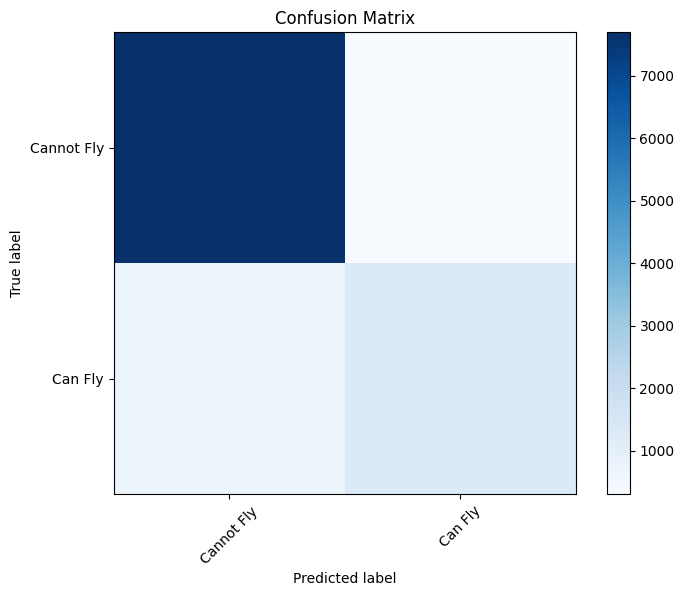

In [11]:
cm = confusion_matrix(test_labels_binary, predictions_binary)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Cannot Fly', 'Can Fly'], rotation=45)
plt.yticks(np.arange(2), ['Cannot Fly', 'Can Fly'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix visualization illustrates the performance of the classification model. The diagonal elements represent the number of correctly classified instances for each class, while off-diagonal elements indicate misclassifications. In this case, the x-axis denotes the predicted labels (Can Fly or Cannot Fly), while the y-axis represents the true labels. The colormap intensity corresponds to the number of instances in each cell, with darker shades indicating higher counts. This visualization provides insights into the model's strengths and weaknesses in classifying between flying and non-flying classes.